In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
firearm = pd.read_csv('firearm.csv')
ms = pd.read_csv('ms.csv')
pop = pd.read_csv('pop.csv')
gdp = pd.read_csv('gdp.csv')

In [3]:
pop.head()

,﻿Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [4]:
pop.columns[0]

'\xef\xbb\xbfCountry Name'

In [5]:
pop = pop[['\xef\xbb\xbfCountry Name','2012']]
pop.rename(columns={'\xef\xbb\xbfCountry Name': 'Country Name', '2012': 'population'}, inplace=True)
gdp = gdp[['\xef\xbb\xbfCountry Name','2012']]
gdp.rename(columns={'\xef\xbb\xbfCountry Name': 'Country Name', '2012': 'gdp'}, inplace=True)

In [6]:
df = pd.merge(ms,firearm, right_on="Country/Territory", left_on="Country")
df = pd.merge(df,pop, right_on="Country Name", left_on="Country")
df = pd.merge(df,gdp, right_on="Country Name", left_on="Country")
df.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country Name_x,population,Country Name_y,gdp
0,Australia,15.0,4,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,22728254.0,Australia,1.538190e+12
1,Austria,30.4,1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,8429991.0,Austria,4.074520e+11
2,Canada,30.8,4,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,34750545.0,Canada,1.824290e+12
3,Denmark,12.0,0,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,5591572.0,Denmark,3.271490e+11
4,Finland,45.3,2,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,Finland,5413971.0,Finland,2.567060e+11


In [7]:
df = df[['Country','Average total all civilian firearms','population','gdp','Number of homicides by firearm',
        'Guns/100 inhabitants','Number of mass shootings']]
df.head()

,Country,Average total all civilian firearms,population,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22728254.0,1.538190e+12,30.0,15.0,4
1,Austria,2500000.0,8429991.0,4.074520e+11,18.0,30.4,1
2,Canada,9950000.0,34750545.0,1.824290e+12,173.0,30.8,4
3,Denmark,650000.0,5591572.0,3.271490e+11,15.0,12.0,0
4,Finland,2400000.0,5413971.0,2.567060e+11,24.0,45.3,2


# Plot mass shooting vs gdp 
# Absolute numbers with errors:


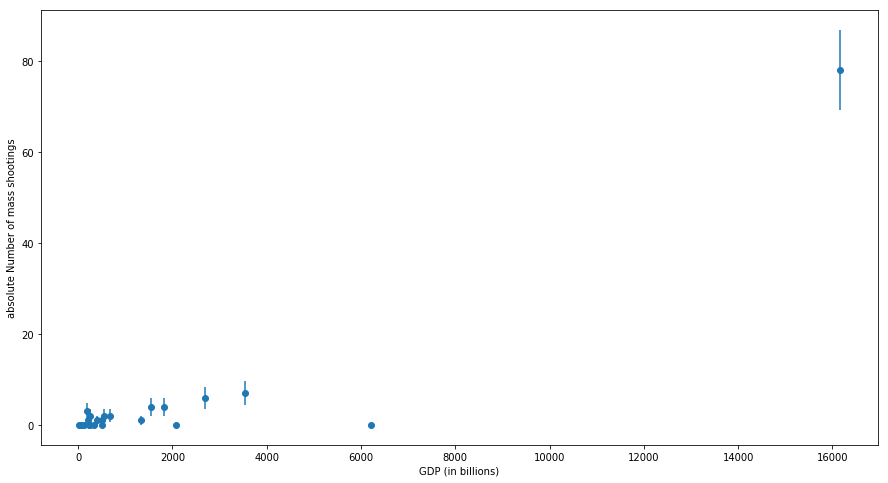

Number of mass shooting vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [8]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("absolute Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

# Per person with errors:

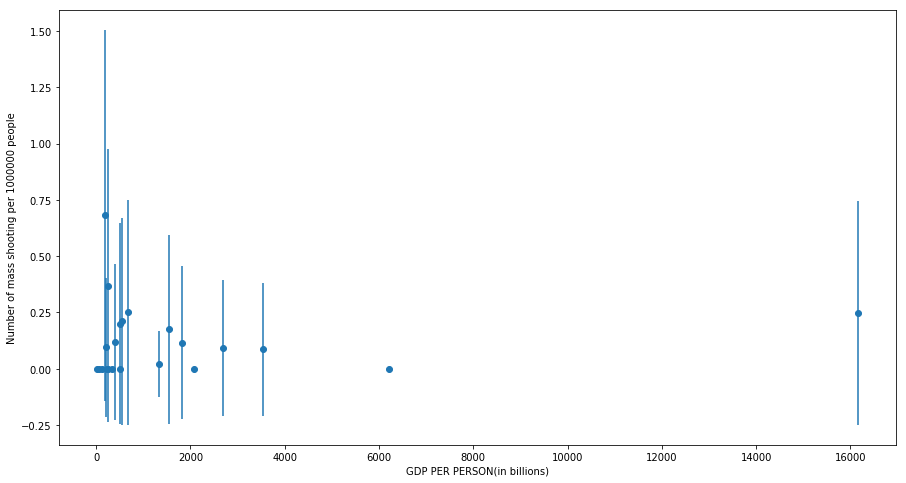

Number of mass shooting per 1000000 people vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings per 1000000 people


In [9]:
df['shootingspp'] = df["Number of mass shootings"] / df['population'] * 1e6
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['shootingspp'])
ax.errorbar(df.gdp / 1e9, df['shootingspp'], 
            yerr = np.sqrt(df['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP PER PERSON(in billions)")
ax.set_ylabel("Number of mass shooting per 1000000 people")
ax.set_ylim()
pl.show()
print ("Number of mass shooting per 1000000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings per 1000000 people")

# Plot the average number of civilian fire arms per person
# Hist:

the frequency of average total all civilian firearms per 1000 person


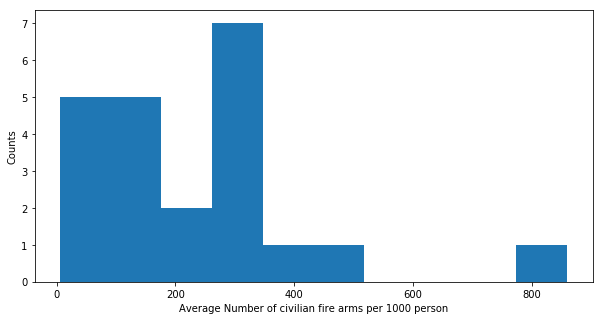

In [10]:
df['firearmspp'] = df['Average total all civilian firearms']/df['population']* 1e3
fig = pl.figure(figsize(10, 5))
ax = fig.add_subplot(111)
hist = ax.hist(df["firearmspp"],bins=10)
ax.set_xlabel("Average Number of civilian fire arms per 1000 person")
ax.set_ylabel("Counts")
ax.set_ylim()
print("the frequency of average total all civilian firearms per 1000 person")

# Against GDP without errors:

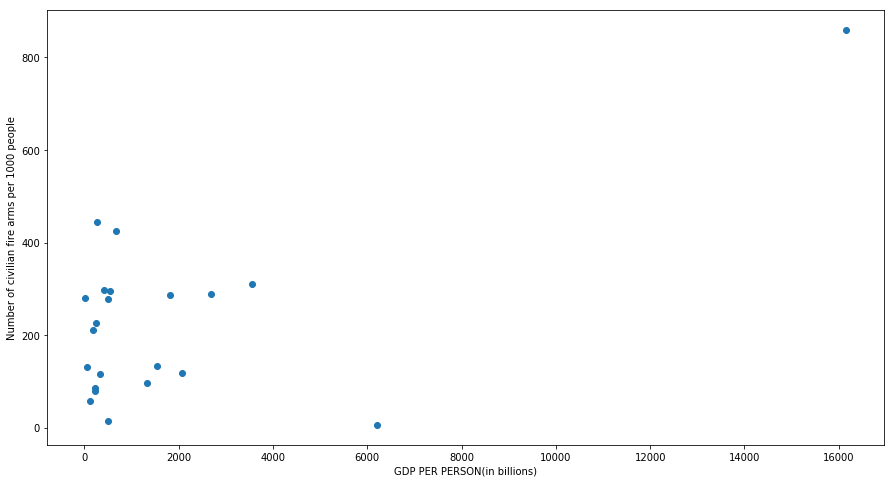

Number of civilian fire arms per 1000 people vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest Number of civilian fire arms per 1000 people


In [11]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['firearmspp'])
ax.set_xlabel("GDP PER PERSON(in billions)")
ax.set_ylabel("Number of civilian fire arms per 1000 people")
ax.set_ylim()
pl.show()
print ("Number of civilian fire arms per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest Number of civilian fire arms per 1000 people")

# Against GDP with errors:

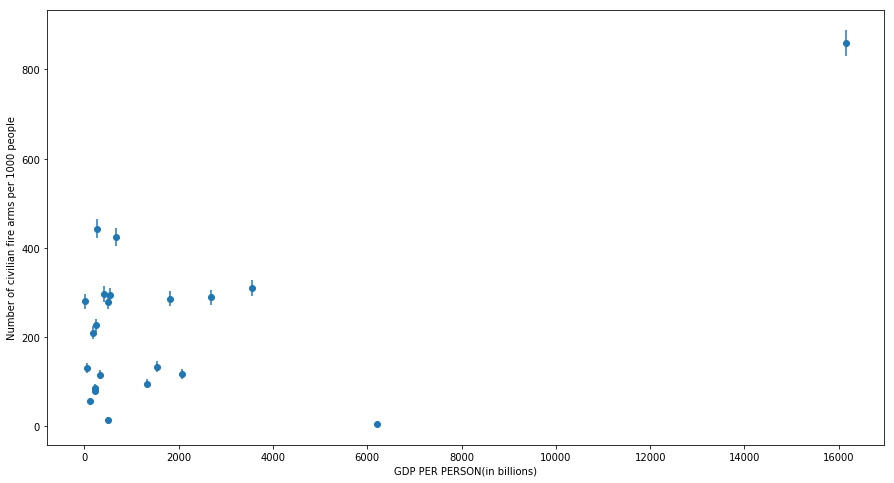

Number of civilian fire arms per 1000 people vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest Number of civilian fire arms per 1000 people


In [12]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['firearmspp'])
ax.errorbar(df.gdp / 1e9, df['firearmspp'], 
            yerr = np.sqrt(df['firearmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP PER PERSON(in billions)")
ax.set_ylabel("Number of civilian fire arms per 1000 people")
ax.set_ylim()
pl.show()
print ("Number of civilian fire arms per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest Number of civilian fire arms per 1000 people")

# Plot the average number of homicide by fire arms per person
# Hist:

the frequency of average number of homicides by firearm per 1000000 people


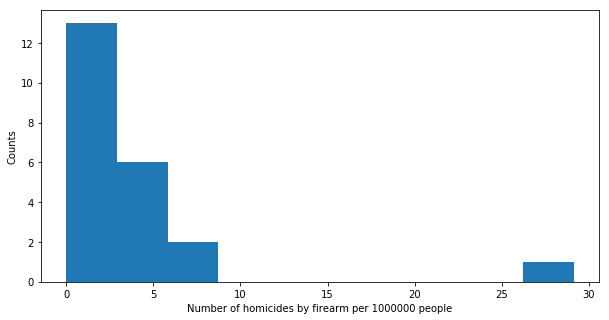

In [13]:
df['homicidespp'] = df['Number of homicides by firearm']/df['population']* 1e6
fig = pl.figure(figsize(10, 5))
ax = fig.add_subplot(111)
hist = ax.hist(df["homicidespp"],bins=10)
ax.set_xlabel("Number of homicides by firearm per 1000000 people")
ax.set_ylabel("Counts")
ax.set_ylim()
print("the frequency of average number of homicides by firearm per 1000000 people")

# Against GDP with errors:

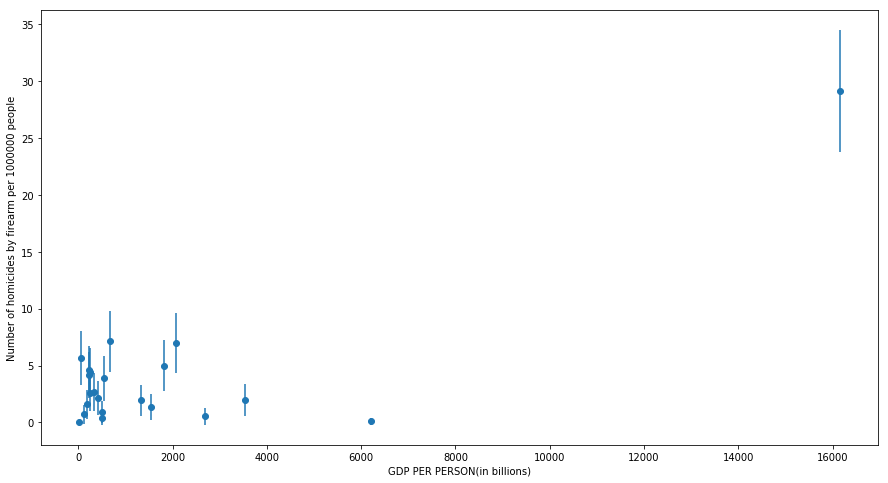

Number of homicides by firearm per 1000000 people vs GDP, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest GDP and the Number of homicides by firearm per 1000000 people


In [14]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['homicidespp'])
ax.errorbar(df.gdp / 1e9, df['homicidespp'], 
            yerr = np.sqrt(df['homicidespp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP PER PERSON(in billions)")
ax.set_ylabel("Number of homicides by firearm per 1000000 people")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 1000000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the Number of homicides by firearm per 1000000 people")

# Plot the number of homicides by fire arm against the number of civilian firearms.plot the US in a different color
# Without errors:

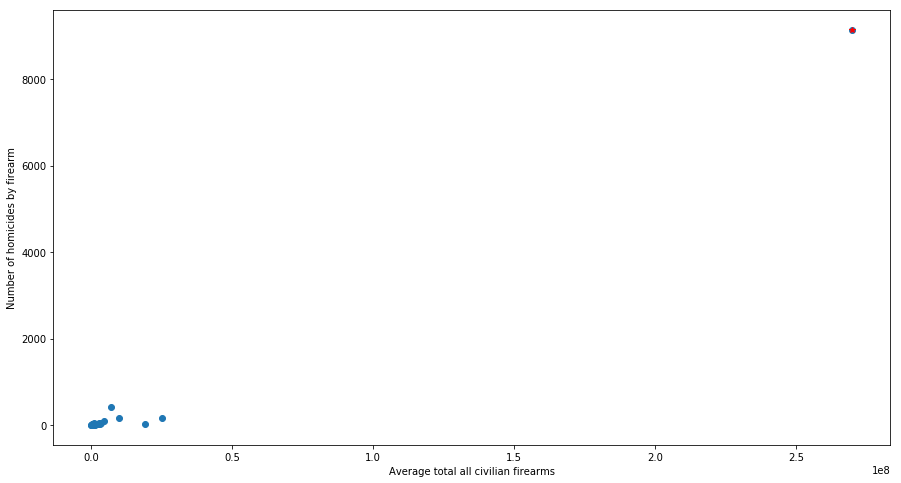

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest Average total all civilian firearms and the highest Number of homicides by firearm


In [15]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'],df['Number of homicides by firearm'] )
ax.plot(df["Average total all civilian firearms"][21],df["Number of homicides by firearm"][21], 'r*')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest Average total all civilian firearms and the highest Number of homicides by firearm")

# With errors: in this case, the errorbar is too tiny to find

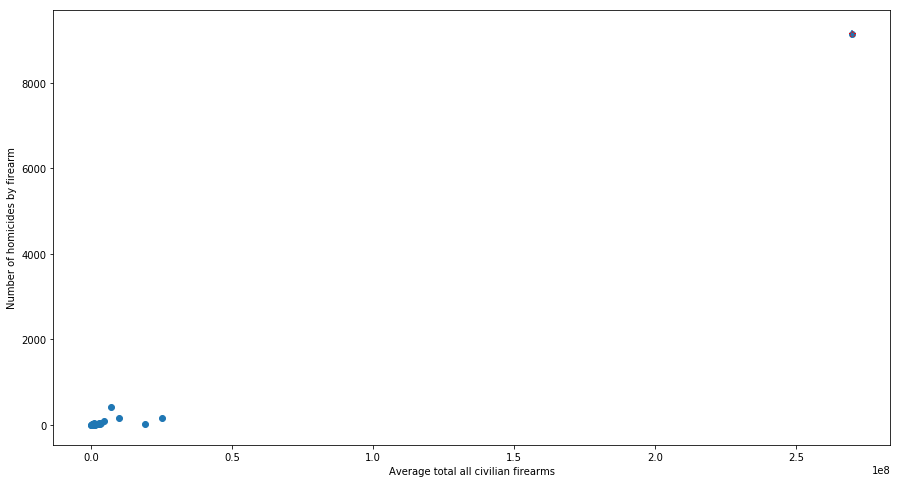

Number of homicides by firearm vs Average total all civilian firearms, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest Average total all civilian firearms and the highest Number of homicides by firearm


In [16]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'],df['Number of homicides by firearm'])
ax.errorbar(df['Average total all civilian firearms'],df['Number of homicides by firearm'],
            yerr = np.sqrt(df['Number of homicides by firearm'] * 1.0), fmt = '.')
ax.plot(df["Average total all civilian firearms"][21],df["Number of homicides by firearm"][21], 'r*')
ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest Average total all civilian firearms and the highest Number of homicides by firearm")

# Plot the number of mass shootings against the number of civilian firearms. plot the US in a different color.
# Without errors:

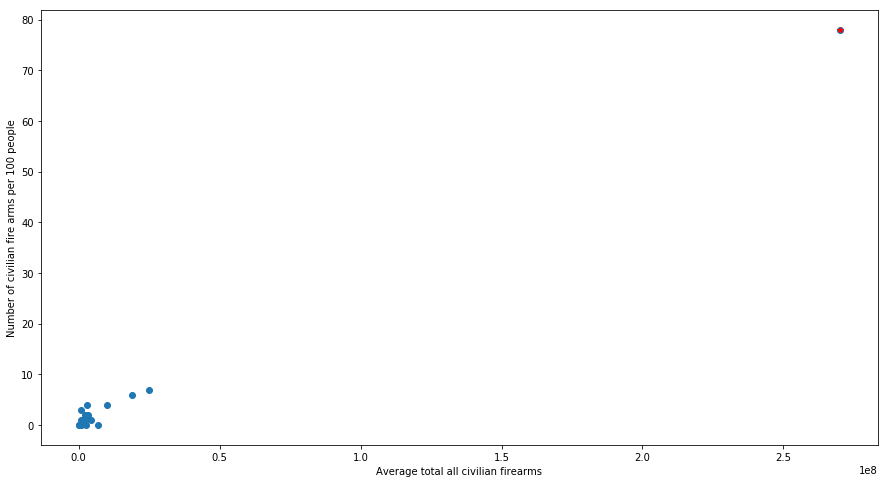

Number of mass shootings vs Average total all civilian firearms, errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest Number of mass shootings and the highest number of Average total all civilian firearms


In [17]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'],df['Number of mass shootings'] )
ax.plot(df["Average total all civilian firearms"][21],df["Number of mass shootings"][21], 'r*')
ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of civilian fire arms per 100 people")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest Number of mass shootings and the highest number of Average total all civilian firearms")

# With errors:

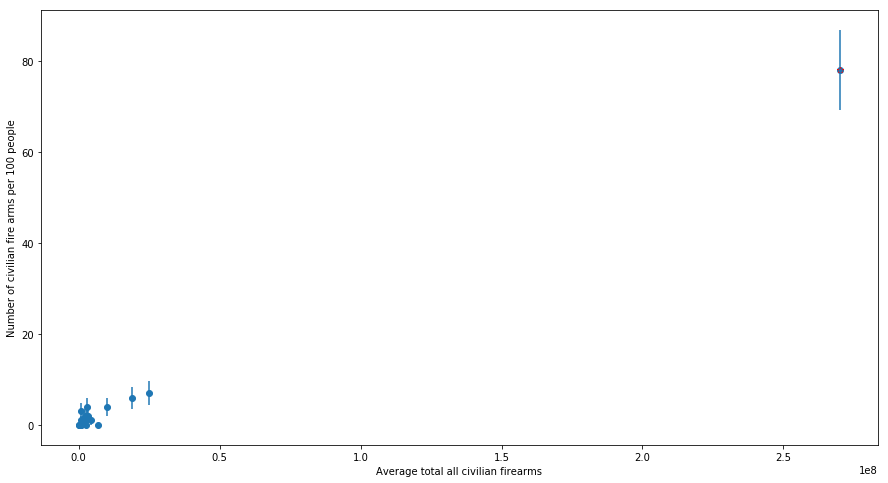

Number of mass shootings vs Average total all civilian firearms,  errors represent Poisson statistics.
Outliers:The datapoint to the top right of the plot is the USA, which has both the highest Number of mass shootings and the highest number of Average total all civilian firearms


In [18]:
fig = pl.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df['Average total all civilian firearms'],df['Number of mass shootings'] )
ax.errorbar(df['Average total all civilian firearms'],df['Number of mass shootings'],
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.plot(df["Average total all civilian firearms"][21],df["Number of mass shootings"][21], 'r*')
ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of civilian fire arms per 100 people")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Average total all civilian firearms,  " + 
       "errors represent Poisson statistics.\n" + 
       "Outliers:The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest Number of mass shootings and the highest number of Average total all civilian firearms")

In [20]:
df.head()

,Country,Average total all civilian firearms,population,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings,shootingspp,firearmspp,homicidespp
0,Australia,3050000.0,22728254.0,1.538190e+12,30.0,15.0,4,0.175992,134.194206,1.319943
1,Austria,2500000.0,8429991.0,4.074520e+11,18.0,30.4,1,0.118624,296.560222,2.135234
2,Canada,9950000.0,34750545.0,1.824290e+12,173.0,30.8,4,0.115106,286.326445,4.978339
3,Denmark,650000.0,5591572.0,3.271490e+11,15.0,12.0,0,0.000000,116.246379,2.682609
4,Finland,2400000.0,5413971.0,2.567060e+11,24.0,45.3,2,0.369415,443.297535,4.432975


# Modeling

# OLS

In [23]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns 

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [26]:
df1 = pd.DataFrame()
df1['num_mash_pp'] = df['Number of mass shootings'] / df['population']
df1['num_avci_pp'] = df['Average total all civilian firearms'] / df['population']

mean_mash = df1['num_mash_pp'].mean()
mean_avci = df1['num_avci_pp'].mean()
print(mean_mash, mean_avci)

# now to normalize the mass shooting per person and fire arms per persons
df1['num_mash_pp'] *= 1e07
df1['num_avci_pp'] *= 10

lm1 = smf.ols(formula = 'num_mash_pp ~ num_avci_pp', data = df1).fit()
lm1.summary()

(1.2102125439686046e-07, 0.22895008572891778)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            num_mash_pp   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        22:15:46   Log-Likelihood:                -39.232
No. Observations:                  22   AIC:                             82.46
Df Residuals:                      20   BIC:                             84.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.3149      0.515      0.612      0.548        -0.759     1.388
num_avci_pp     0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

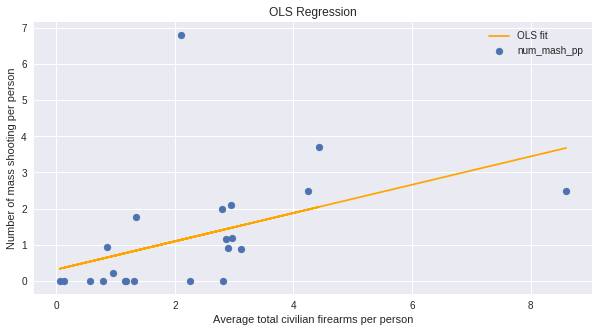

In [32]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

pl.scatter(df1['num_avci_pp'], df1['num_mash_pp'])
ax.plot( df1['num_avci_pp'],lm1.predict(), c="orange", label="OLS fit")
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('OLS Regression')
ax.set_ylim()
pl.legend()
pl.show()

# WLS

In [40]:
df1['y_error'] = np.sqrt(df['Number of mass shootings']) / df['population']
e_mean = df1['y_error'].mean()
df1['y_error'][(df1['y_error'] == 0)] = e_mean
df1['y_error'] = df1['y_error'] ** 2
wls_model = sm.WLS(df1['num_mash_pp'],df1['num_avci_pp'], weights=1/df1['y_error']).fit()
wls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            num_mash_pp   R-squared:                       0.901
Model:                            WLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           5.38e-12
Time:                        22:43:36   Log-Likelihood:                -19.698
No. Observations:                  22   AIC:                             41.40
Df Residuals:                      21   BIC:                             42.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
num_avci_pp     0.2917      0.021     13.790      0.000         0.248     0.336
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.742
Skew:                           0.378   Prob(JB):                        0.690
Kurtosis:                       2.513   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

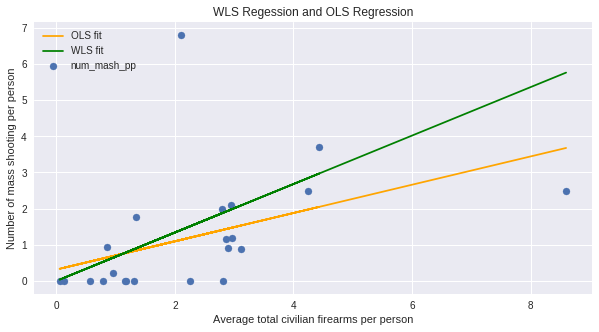

In [36]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

pl.scatter(df1['num_avci_pp'], df1['num_mash_pp'])
pl.plot(df1['num_avci_pp'],lm1.predict(), c="orange", label="OLS fit")
pl.plot(df1['num_avci_pp'],wls_model.predict(df1['num_avci_pp']), c="green", label="WLS fit")
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('WLS Regession and OLS Regression')
ax.set_ylim()
pl.legend()
pl.show()

# Seaborn Regression

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


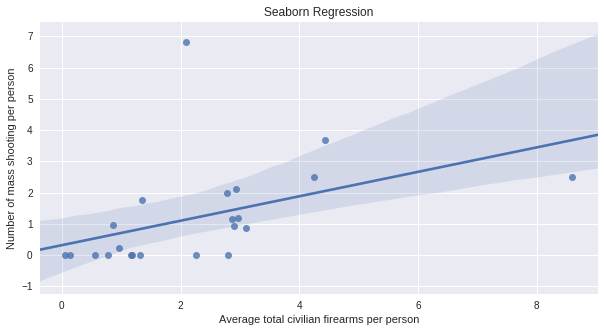

In [37]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax = sns.regplot(x = df1['num_avci_pp'], y = df1['num_mash_pp'], data=df1)
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('Seaborn Regression')
pl.legend()
pl.show()

# Polyfit Fifth Order Regreession

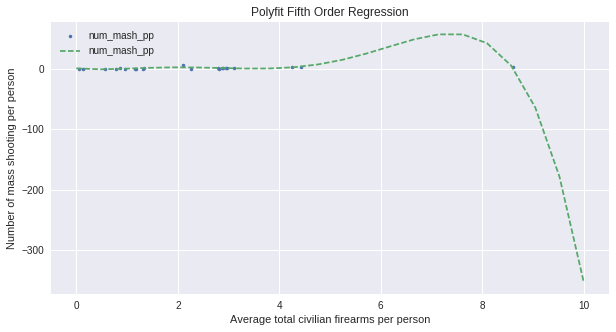

In [38]:
md = np.polyfit(df1['num_avci_pp'], df1['num_mash_pp'], 5)
p5 = np.poly1d(md)
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

x = np.linspace(0,10,22)

ax.plot(df1['num_avci_pp'], df1['num_mash_pp'], '.', x, p5(x), '--')
ax.set_xlabel("Average total civilian firearms per person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_title('Polyfit Fifth Order Regression')
pl.legend()
pl.show()